In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt 

In [2]:
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure
    x_min, x_max = min(X[:,0]) - 1.0, max(X[:,0]) + 1.0
    y_min, y_max = min(X[:,1]) - 1.0, max(X[:,1]) + 1.0
    
    # denotes the step size that will be used in the mesh grid
    step_size = 0.01
    
    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                     np.arange(y_min, y_max, step_size))
    
    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    
    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)
    
    # plot the output using a colored plot
    plt.figure()
    
    # choose a color scheme
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    
    # overlay the training points on the plot
    plt.scatter(X[:,0], X[:,1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    
    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))
    
    plt.show()

In [3]:
X = np.array([[4,7], [3.5,8], [3.1,6.2], [0.5,1],
             [1,2], [1.2,1.9], [6,2], [5.7,1.5], [5.4, 2.2]])
y = np.array([0,0,0,1,1,1,2,2,2])

In [4]:
classifier100 = linear_model.LogisticRegression(solver='liblinear', C=100)
classifier100.fit(X, y)
classifier1000 = linear_model.LogisticRegression(solver='liblinear', C=1000)
classifier1000.fit(X, y)
classifier10 = linear_model.LogisticRegression(solver='liblinear', C=10)
classifier10.fit(X, y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

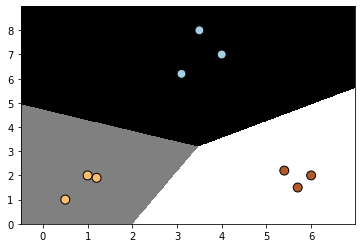

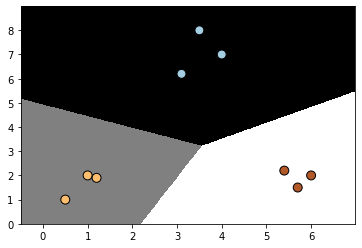

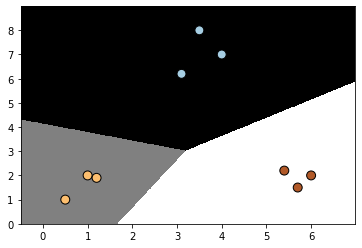

In [5]:
plot_classifier(classifier100, X, y)
plot_classifier(classifier1000, X, y)
plot_classifier(classifier10, X, y)